In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralClustering
import numpy as np

# Your matrix Q of latent factors
# For demonstration, let's assume it's a 5x5 matrix
Q = np.random.rand(5, 5)

# Calculate cosine similarity matrix
S = cosine_similarity(Q)

# Perform spectral clustering
# Here, n_clusters is the number of clusters you want to create
# This should be chosen based on domain knowledge or using methods like the Elbow method
n_clusters = 2
clustering = SpectralClustering(
    n_clusters=n_clusters, affinity="precomputed", random_state=0
).fit(S)

# Print cluster labels for each patient
print(clustering.labels_)


[1 1 0 1 1]


c:\Users\marco\anaconda3\envs\RSThesisEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


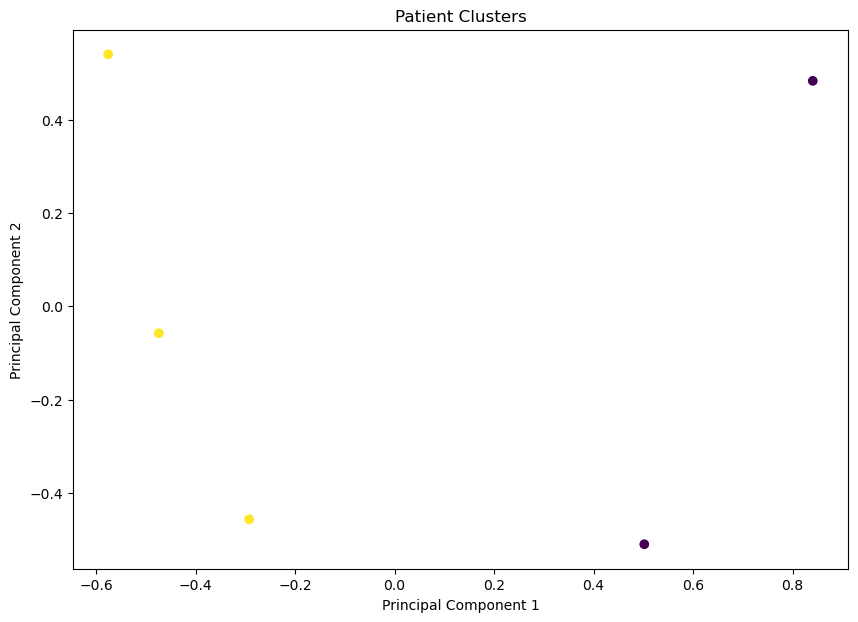

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
Q_pca = pca.fit_transform(Q)

# Plot each patient, colored by cluster label
plt.figure(figsize=(10, 7))
plt.scatter(Q_pca[:, 0], Q_pca[:, 1], c=clustering.labels_, cmap="viridis")

plt.title("Patient Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()


In [1]:
import numpy as np
from scipy.sparse import random, csr_matrix

m = 25000
n = 25000
f = 100

# Initialize Q and P as dense matrices
Q = np.random.rand(m, f)
P = np.random.rand(n, f)

# Initialize R as a sparse matrix in COO format
density = 0.2  # Adjust the density of non-zero elements in R
R_coo = random(m, n, density=density)

# Convert R to CSR format
R_csr = R_coo.tocsr()

print("Shape of Q:", Q.shape)
print("Shape of P:", P.shape)
print("Shape of R:", R_csr.shape)


Shape of Q: (25000, 100)
Shape of P: (25000, 100)
Shape of R: (25000, 25000)


In [2]:
R = R_csr.toarray()
R[R == 0] = np.nan
type(R)


numpy.ndarray

In [4]:
E = np.nan_to_num(Q @ P.T - R)
        dJ_dQ = E @ P + lambQ * Q
        dJ_dP = E.T @ Q + lambP * P

In [7]:
E = np.nan_to_num(Q @ P.T - R)
dJ_dQ = E @ P
dJ_dP = E.T @ Q


In [8]:
import numpy as np
from scipy.sparse import csr_matrix

R_hat = Q.dot(P.T)
# Assuming R_hat is a dense NumPy array and R_csr is a CSR matrix

# Create a binary mask where R_hat is zero
mask = R_hat == 0

# Apply np.nan to zero entries in R_hat
R_hat_with_nan = np.where(mask, np.nan, R_hat)

# Perform element-wise subtraction between R_hat_with_nan and R_csr
result_data = R_hat_with_nan - R_csr

# Create the result matrix as a CSR matrix
result_csr = csr_matrix(result_data)


KeyboardInterrupt: 

In [4]:
from cost_functions import get_Jsim_and_DJsim


In [12]:
J, DJ = get_Jsim_and_DJsim(R, f, lambQ=1e6, lambP=1e6)


In [6]:
import inspect

lines = inspect.getsource(J)
print(lines)

    def Jsim(Theta):
        Q = Theta[: m * f].reshape(m, f)
        P = Theta[m * f :].reshape(n, f)

        J = np.nansum(np.square(Q @ P.T - R)) / 2
        if lambQ != 0:
            print(1)
            J += (lambQ / 2) * np.sum(np.square(Q))
        if lambP != 0:
            print(2)
            J += (lambP / 2) * np.sum(np.square(P))

        return J



In [8]:
Theta = np.concatenate((Q.flatten(), P.flatten()))


In [16]:
J(Theta)


37859262421.94628

In [10]:
J(Theta)


37764165608.84092

In [13]:
J(Theta)


1
2


871424236288.191

In [14]:
lambQ = 0
lambP = 0
E = csr_matrix(Q @ P.T - R)
dJ_dQ = E @ P
if lambQ != 0:
    dJ_dQ += lambQ * Q

dJ_dP = E.T @ Q
if lambP != 0:
    dJ_dP += lambP * P

dJ_dTheta = np.concatenate((dJ_dQ, dJ_dP))


In [17]:
from scipy.sparse import coo_matrix


In [18]:
lambQ = 0
lambP = 0
E = coo_matrix(Q @ P.T - R)
dJ_dQ = E @ P + lambQ * Q

dJ_dP = E.T @ Q + lambP * P

dJ_dTheta = np.concatenate((dJ_dQ, dJ_dP))


In [27]:
lambQ = 0.1
lambP = 0.1
E = np.nan_to_num(Q @ P.T - R)
dJ_dQ = E @ P + lambQ * Q

dJ_dP = E.T @ Q + lambP * P

dJ_dTheta = np.concatenate((dJ_dQ, dJ_dP))


In [26]:
lambQ = 0.1
lambP = 0.1

E = np.nan_to_num(Q @ P.T - R)

dJ_dQ = E @ P
if lambQ != 0:
    dJ_dQ += lambQ * Q

dJ_dP = E.T @ Q
if lambP != 0:
    dJ_dP += lambP * P

dJ_dTheta = np.concatenate((dJ_dQ, dJ_dP))
